## Sentiment Analysis on Movie Reviews

The sentiment of reviews is binary, meaning the rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1.
No individual movie has more than 30 reviews. 

##### Data fields
- id - Unique ID of each review
- sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
- review - Text of the revie

### Problem Statement:

Build a sentiment analysis model to classify movie reviews as positive or negative based on the text content. Utilize techniques such as word embeddings, word to vec, Bag of words etc. 

To accomplish this, you need to follow the below steps:
-  Data Preprocessing:
- Feature Extraction:
- Model Building and Evaluation:
- Evaluate the model's performance 

In [1]:
# importing neccessary libraries

import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# Reading the dataset
data = pd.read_csv('labeledTrainData.tsv', delimiter='\t')
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [3]:
data.shape

(25000, 3)

In [4]:
data.dtypes

id           object
sentiment     int64
review       object
dtype: object

In [5]:
#Summary of the dataset
data.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [6]:
# Checking for null values
data.isna().sum()                                # No null values present

id           0
sentiment    0
review       0
dtype: int64

In [7]:
data['review'][1]

'\\The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \\"critics\\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells\' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \\"critics\\" perceive to be its shortcomings."'

In [8]:
#sentiment count
data['sentiment'].value_counts()            # Dataset is Balanced 

1    12500
0    12500
Name: sentiment, dtype: int64

In [9]:
# Checking for duplicate values
data.duplicated().sum()                    # No duplicate values present

0

## Basic Preprocessing
- Removing tags
- lowercasing
- removing punctuations
- removing stopwords
- lemmatization

#### Removing HTML tags

In [10]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

data['review'] = data['review'].apply(remove_tags)

In [11]:
data['review'][1]

'\\The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \\"critics\\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells\' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \\"critics\\" perceive to be its shortcomings."'

#### Lowercasing

In [12]:
data['review'] = data['review'].apply(lambda x:x.lower())

#### Removing punctuations

In [13]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


data['review'] = data['review'].apply(lambda text: remove_punctuation(text))

In [14]:
data['review'][1]

'the classic war of the worlds by timothy hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate h g wells classic book mr hines succeeds in doing so i and those who watched his film with me appreciated the fact that it was not the standard predictable hollywood fare that comes out every year eg the spielberg version with tom cruise that had only the slightest resemblance to the book obviously everyone looks for different things in a movie those who envision themselves as amateur critics look only to criticize everything they can others rate a movie on more important baseslike being entertained which is why most people never agree with the critics we enjoyed the effort mr hines put into being faithful to hg wells classic novel and we found it to be very entertaining this made it easy to overlook what the critics perceive to be its shortcomings'

#### Removing stopwords

In [15]:
from nltk.corpus import stopwords

sw_list = stopwords.words('english')

data['review'] = data['review'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

In [16]:
data.head()

,id,sentiment,review
0,5814_8,1,stuff going moment mj ive started listening mu...
1,2381_9,1,classic war worlds timothy hines entertaining ...
2,7759_3,0,film starts manager nicholas bell giving welco...
3,3630_4,0,must assumed praised film greatest filmed oper...
4,9495_8,1,superbly trashy wondrously unpretentious 80s e...


#### Lemmatization

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

data["review"] = data["review"].apply(lambda text: lemmatize_words(text))
data.head()

,id,sentiment,review
0,5814_8,1,stuff going moment mj ive started listening mu...
1,2381_9,1,classic war world timothy hines entertaining f...
2,7759_3,0,film start manager nicholas bell giving welcom...
3,3630_4,0,must assumed praised film greatest filmed oper...
4,9495_8,1,superbly trashy wondrously unpretentious 80 ex...


## Feature Extraction Techniques:
- BOW
- TF-IDF
- Word2Vec


In [19]:
x = data.iloc[:,2:3]
x.head()

,review
0,stuff going moment mj ive started listening mu...
1,classic war world timothy hines entertaining f...
2,film start manager nicholas bell giving welcom...
3,must assumed praised film greatest filmed oper...
4,superbly trashy wondrously unpretentious 80 ex...


In [20]:
y= data['sentiment']
y.head()

0    1
1    1
2    0
3    0
4    1
Name: sentiment, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=134)

In [22]:
x_train

,review
17272,admit weakness alternate history story wonderf...
11941,sur me lèvres read lip fine little thriller al...
2802,sex youve ever farm animal tag line movie prob...
4511,browsing internet previous sale price ran acro...
7929,nope going get refuse go along program dont su...
...,...
1202,kept attention start finish great performance ...
13687,take special kind person make movie wretched b...
11640,found imdb searched film moved almost tear com...
13862,known fall asleep film usually due combination...


### BOW

Bags of words model : It is used to convert text documents to numerical vectors or bag of words.

In [28]:
cv = CountVectorizer(stop_words = "english", min_df = 10, max_df=200, max_features = 2000)

In [29]:
#parse matrix to numpy array to_array
x_train_bow = cv.fit_transform(x_train['review']).toarray()
x_test_bow = cv.transform(x_test['review']).toarray()

In [30]:
print(cv.vocabulary_)

{'weakness': 1958, 'destiny': 487, 'murderous': 1169, 'cox': 408, 'scale': 1555, 'afternoon': 57, 'rental': 1466, 'lip': 1043, 'tense': 1803, 'tight': 1831, 'significant': 1623, 'statement': 1703, 'thirty': 1818, 'secretary': 1569, 'bleak': 179, 'enter': 587, 'vincent': 1931, 'ad': 42, 'assistant': 115, 'meeting': 1115, 'hoped': 855, 'sleazy': 1647, 'letter': 1030, 'discovers': 514, 'spy': 1694, 'join': 966, 'gain': 725, 'freedom': 711, 'seat': 1568, 'unlikely': 1907, 'factor': 640, 'sensitive': 1580, 'hearing': 818, 'aid': 59, 'rank': 1418, 'noir': 1202, 'farm': 652, 'lying': 1074, 'burning': 242, 'iti': 940, 'unable': 1885, 'fictional': 662, 'conspiracy': 373, 'internet': 922, 'price': 1356, 'ran': 1416, 'refuse': 1443, 'program': 1374, 'overrated': 1257, 'reader': 1425, '710': 24, 'mainstream': 1085, 'bag': 136, 'thrill': 1822, 'itthe': 941, '25': 19, 'hardcore': 805, 'appropriate': 105, 'critical': 423, 'religion': 1455, 'remaining': 1458, 'acceptable': 32, 'revealed': 1494, 'bbc':

In [31]:
len(cv.vocabulary_)

2000

### TF-IDF

Term Frequency-Inverse Document Frequency model (TFIDF) : It is used to convert text documents to matrix of tfidf features.

In [32]:
tfidfvec = TfidfVectorizer(stop_words = "english", min_df = 10, max_df=200, max_features = 2000)

In [33]:
#parse matrix to numpy array to_array
x_train_tfidf= tfidfvec.fit_transform(x_train['review']).toarray()
x_test_tfidf = tfidfvec.transform(x_test['review']).toarray()

In [34]:
print(tfidfvec.vocabulary_)

{'weakness': 1958, 'destiny': 487, 'murderous': 1169, 'cox': 408, 'scale': 1555, 'afternoon': 57, 'rental': 1466, 'lip': 1043, 'tense': 1803, 'tight': 1831, 'significant': 1623, 'statement': 1703, 'thirty': 1818, 'secretary': 1569, 'bleak': 179, 'enter': 587, 'vincent': 1931, 'ad': 42, 'assistant': 115, 'meeting': 1115, 'hoped': 855, 'sleazy': 1647, 'letter': 1030, 'discovers': 514, 'spy': 1694, 'join': 966, 'gain': 725, 'freedom': 711, 'seat': 1568, 'unlikely': 1907, 'factor': 640, 'sensitive': 1580, 'hearing': 818, 'aid': 59, 'rank': 1418, 'noir': 1202, 'farm': 652, 'lying': 1074, 'burning': 242, 'iti': 940, 'unable': 1885, 'fictional': 662, 'conspiracy': 373, 'internet': 922, 'price': 1356, 'ran': 1416, 'refuse': 1443, 'program': 1374, 'overrated': 1257, 'reader': 1425, '710': 24, 'mainstream': 1085, 'bag': 136, 'thrill': 1822, 'itthe': 941, '25': 19, 'hardcore': 805, 'appropriate': 105, 'critical': 423, 'religion': 1455, 'remaining': 1458, 'acceptable': 32, 'revealed': 1494, 'bbc':

In [35]:
len(tfidfvec.vocabulary_)

2000

### Word2Vec

In [36]:
import gensim

In [37]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [38]:
story = []
for doc in data['review']: #We sentence tokenize our doc then do preprocessing
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [39]:
#Model building            by default dimension is 100 in gensim
model = gensim.models.Word2Vec(
    window=10,
    min_count=2
)

In [40]:
#building vocabulary
model.build_vocab(story)

In [41]:
#training our model (trained word2vec model)
model.train(story, total_examples=model.corpus_count, epochs=model.epochs)

(13867571, 14927130)

In [42]:
len(model.wv.index_to_key)   #no.of words in our vocabulary

49825

In [43]:
#we created vector for our words, now we will create vector to represent our reviews
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

In [44]:
document_vector(data['review'].values[0])     #converted reviews to vector with 100 dimension

array([-0.67465407,  0.8600585 ,  0.34244135, -0.03507954, -0.15696856,
       -0.3479593 ,  0.01122125,  0.5490439 , -0.09887885, -0.64852077,
        0.02789598, -0.38325655,  0.35154057,  0.10322352,  0.5449256 ,
        0.01012369,  0.31994337, -0.14472565, -0.19945711, -0.26307076,
       -0.11440386,  0.18008424, -0.04888498, -0.00108657, -0.6045311 ,
        0.04370764, -0.0513158 , -0.22898714,  0.07807425,  0.9228175 ,
        0.75104254, -0.5010358 ,  0.12817104, -0.24349721, -0.09079939,
        0.34880888,  0.2349824 , -0.43717706, -0.13042906, -0.51481897,
        0.021397  , -0.37426326,  0.31792971, -0.63941276,  0.23125331,
       -0.19711353, -0.00965655, -0.55907464,  0.17134573,  0.05498615,
        0.27588868,  0.04596198,  0.0235686 , -0.31612012,  0.00981878,
       -0.01444506,  0.16357473, -0.06730402, -0.3606394 ,  0.51085305,
        0.45772898,  0.22069132,  0.6749968 ,  0.24731249, -0.2216854 ,
        0.33845723,  0.20930403,  0.14701699, -0.46186996, -0.13

In [45]:
from tqdm import tqdm

In [46]:
X = []
for doc in tqdm(data['review'].values):
    X.append(document_vector(doc))

100%|██████████| 25000/25000 [12:35<00:00, 33.07it/s]


In [47]:
X = np.array(X)

In [48]:
X.shape

(25000, 100)

In [49]:
X[0]

array([-0.67465407,  0.8600585 ,  0.34244135, -0.03507954, -0.15696856,
       -0.3479593 ,  0.01122125,  0.5490439 , -0.09887885, -0.64852077,
        0.02789598, -0.38325655,  0.35154057,  0.10322352,  0.5449256 ,
        0.01012369,  0.31994337, -0.14472565, -0.19945711, -0.26307076,
       -0.11440386,  0.18008424, -0.04888498, -0.00108657, -0.6045311 ,
        0.04370764, -0.0513158 , -0.22898714,  0.07807425,  0.9228175 ,
        0.75104254, -0.5010358 ,  0.12817104, -0.24349721, -0.09079939,
        0.34880888,  0.2349824 , -0.43717706, -0.13042906, -0.51481897,
        0.021397  , -0.37426326,  0.31792971, -0.63941276,  0.23125331,
       -0.19711353, -0.00965655, -0.55907464,  0.17134573,  0.05498615,
        0.27588868,  0.04596198,  0.0235686 , -0.31612012,  0.00981878,
       -0.01444506,  0.16357473, -0.06730402, -0.3606394 ,  0.51085305,
        0.45772898,  0.22069132,  0.6749968 ,  0.24731249, -0.2216854 ,
        0.33845723,  0.20930403,  0.14701699, -0.46186996, -0.13

In [50]:
Y = data['sentiment']

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [53]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
accuracy_score(Y_test,Y_pred)

0.8346

## Model Building and Evaluation

### 1. Logistic regression

In [54]:
## Using BOW

In [55]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [56]:
lr.fit(x_train_bow,y_train)
y_pred = lr.predict(x_test_bow)

In [57]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report
accuracy_score(y_test,y_pred)

0.7414

In [58]:
## Using Tf-IDF

In [59]:
lr= LogisticRegression()
lr.fit(x_train_tfidf,y_train)

LogisticRegression()

In [60]:
y_pred = lr.predict(x_test_tfidf)
accuracy_score(y_test,y_pred)

0.7522

## 2. GaussianNB

In [61]:
## Using BOW

In [62]:
#Gaussian Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(x_train_bow,y_train)

GaussianNB()

In [63]:
y_pred = gnb.predict(x_test_bow)

from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.7032

In [64]:
## Using TF-IDF

In [65]:
gnb = GaussianNB()

gnb.fit(x_train_tfidf,y_train)

GaussianNB()

In [66]:
y_pred = gnb.predict(x_test_tfidf)

accuracy_score(y_test,y_pred)

0.7356

## 3. RandomForestClassifier

In [67]:
## Using BOW

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train_bow,y_train)
y_pred = rf.predict(x_test_bow)
accuracy_score(y_test,y_pred)

0.7288

In [69]:
## Using TF-IDF

In [70]:
rf = RandomForestClassifier()

rf.fit(x_train_tfidf,y_train)
y_pred = rf.predict(x_test_tfidf)
accuracy_score(y_test,y_pred)

0.7382

- Best performing one is Logistic Regression model with TF-IDF feature extraction technique

Now, we will try increasing no.of features

In [ ]:
## With max features = 10000

In [76]:
cv = CountVectorizer(max_features=10000)

x_train_bow = cv.fit_transform(x_train['review']).toarray()
x_test_bow = cv.transform(x_test['review']).toarray()


lr= LogisticRegression()

lr.fit(x_train_bow,y_train)
y_pred = lr.predict(x_test_bow)
accuracy_score(y_test,y_pred)

C:\Users\Mohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.86

In [77]:
tfidfvec = TfidfVectorizer(max_features=10000)

x_train_tfidf = tfidfvec.fit_transform(x_train['review']).toarray()
x_test_tfidf = tfidfvec.transform(x_test['review']).toarray()

lr= LogisticRegression()

lr.fit(x_train_tfidf,y_train)
y_pred = lr.predict(x_test_tfidf)
accuracy_score(y_test,y_pred)

0.8852

In [78]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

In [79]:
print('The accuracy score is: ', accuracy_score(y_test,y_pred))

The accuracy score is:  0.8852


In [80]:
recall_score(y_test,y_pred)

0.900829711576452

In [81]:
f1_score(y_test,y_pred)

0.8881963381379042

In [82]:
confusion_matrix(y_test,y_pred)

array([[2146,  323],
       [ 251, 2280]], dtype=int64)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      2469
           1       0.88      0.90      0.89      2531

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

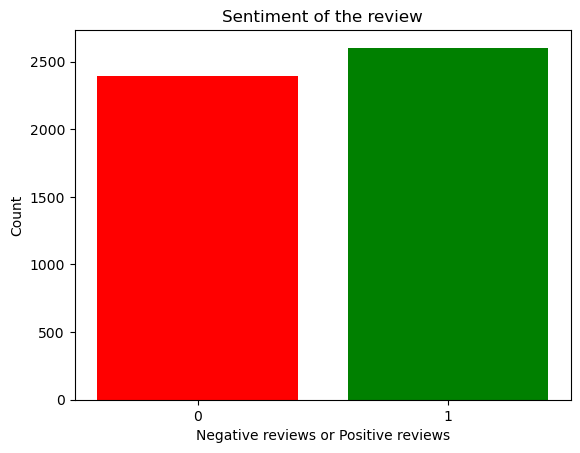

In [103]:
# Calculate the counts of 0s and 1s
unique, counts = np.unique(y_pred, return_counts=True)
counts_dict = dict(zip(unique, counts))
# Define colors for each class
colors = ['red', 'green']

# Create a bar graph
plt.bar(counts_dict.keys(), counts_dict.values(), color=colors)
plt.xlabel('Negative reviews or Positive reviews')
plt.ylabel('Count')
plt.xticks(list(counts_dict.keys()))
plt.title('Sentiment of the review')
plt.show()

# Conclusion: 

#### with max features as 10000, we got accuracy for logistic regression model as 88.52% while using TF-IDF feature extraction Technique

#### using N-grams

In [ ]:
# #N-grams(bi-gram)
# cv = CountVectorizer(ngram_range=(1,2),max_features=5000)

# X_train_bow = cv.fit_transform(X_train['review']).toarray()
# X_test_bow = cv.transform(X_test['review']).toarray()

# rf = RandomForestClassifier()

# rf.fit(X_train_bow,y_train)
# y_pred = rf.predict(X_test_bow)
# accuracy_score(y_test,y_pred)